In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import Hug, MCMC

In [2]:
def normal(D=2, mu=0, sigma=1):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
kernel = Hug(normal, step_size=1, trajectory_length=1)

mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)

mcmc.run(rng_key, D=2, mu=1, sigma=1, extra_fields=('potential_energy','accept_prob'))

  0%|          | 0/1000 [00:00<?, ?it/s]

initializing init_params for hug
initializing preconditioner for hug
finished init for hug


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1239.90it/s]


In [4]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[ 1.8784723 ,  2.16736   ],
              [ 0.18039113,  2.209415  ],
              [ 0.45484072,  2.3554502 ],
              ...,
              [ 0.33743286, -0.30209148],
              [ 0.58192015, -0.39987385],
              [ 0.8355911 , -0.4516914 ]], dtype=float32)}

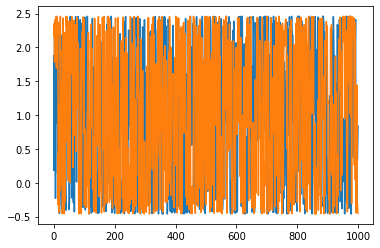

In [5]:
plt.plot(samples["theta"])

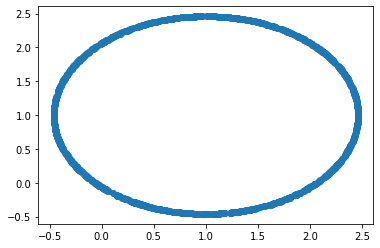

In [6]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

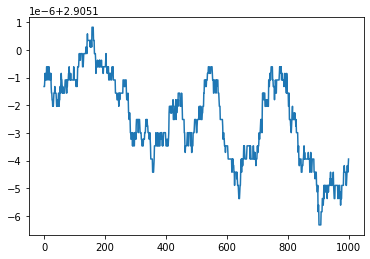

In [7]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

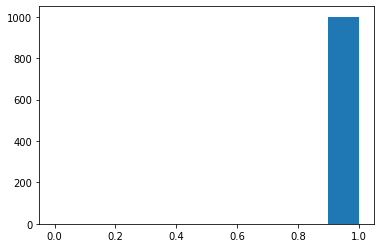

In [8]:
plt.hist(ap, range=(0,1))